In [1]:
import pandas as pd
import numpy as np

from geopy.distance import geodesic

In [2]:
df = pd.read_csv('data\kc_house_data.csv')

In [3]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [4]:
seattle_center_lat = 47.6062
seattle_center_long = -122.3321

In [5]:
seattle_center = tuple([seattle_center_lat, seattle_center_long])

In [6]:
df['seattle_center_lat'] = seattle_center_lat
df['seattle_center_long'] = seattle_center_long

In [7]:
df['lat_long'] = list(zip(df.lat, df.long))

In [8]:
test = df.lat_long[0]

In [9]:
test

(47.5112, -122.257)

In [10]:
geodesic(test, seattle_center).mi

7.44366407355842

In [11]:
df['distance_seattle_cc'] = df.lat_long.map(lambda x: geodesic(x, seattle_center).mi)

In [12]:
df.distance_seattle_cc.describe()

count    21597.000000
mean        11.478249
std          6.617518
min          0.612682
25%          6.082428
50%         10.270154
75%         15.724263
max         48.041997
Name: distance_seattle_cc, dtype: float64

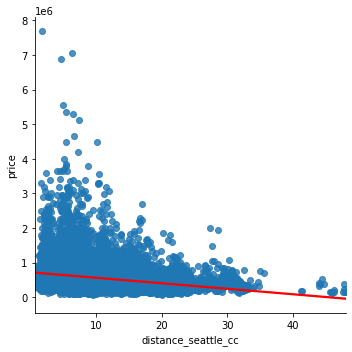

In [13]:
import seaborn as sns

sns.lmplot(data=df, x='distance_seattle_cc', y='price',
           line_kws={'color':'red'});

In [26]:
distance = df[['id', 'price']].copy()

In [27]:
distance['d_from_seattle'] = df.distance_seattle_cc

In [28]:
distance

,id,price,d_from_seattle
0,7129300520,221900.0,7.443664
1,6414100192,538000.0,7.954648
2,5631500400,180000.0,10.206394
3,2487200875,604000.0,6.551165
4,1954400510,510000.0,13.432452
...,...,...,...
21592,263000018,360000.0,6.464577
21593,6600060120,400000.0,6.744170
21594,1523300141,402101.0,1.748355
21595,291310100,400000.0,13.260787


In [29]:
distance.to_csv('data\distances.csv')